<a href="https://colab.research.google.com/github/akheradmand/MachineLearning/blob/main/49/class/titanic.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt

In [3]:
data_train=pd.read_csv("train.csv")
data_train.head(10)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
5,6,0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,NaN,Q
6,7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,E46,S
7,8,0,3,"Palsson, Master. Gosta Leonard",male,2.0,3,1,349909,21.0750,NaN,S
8,9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.0,0,2,347742,11.1333,NaN,S
9,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.0,1,0,237736,30.0708,NaN,C


In [4]:
data_train.replace(["female","male"],[0,1],inplace=True)

In [5]:
data_train.fillna(0, inplace=True)

In [6]:
X_train=np.array(data_train[["Pclass","Sex","Age","SibSp","Parch","Fare"]])
Y_train=np.array(data_train[["Survived"]])

Model

In [10]:
model = tf.keras.models.Sequential([
  tf.keras.layers.Dense(6, activation='sigmoid'),
  tf.keras.layers.Dense(28, activation='relu'),
  tf.keras.layers.Dense(8, activation='sigmoid'),
  tf.keras.layers.Dense(2, activation='softmax')
])


In [11]:
model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=0.01),
              loss=tf.keras.losses.sparse_categorical_crossentropy,
              metrics=['accuracy'])

In [12]:
output=model.fit(X_train,Y_train, epochs=100)

Epoch 1/100
28/28 [==============================] - 1s 2ms/step - loss: 0.6811 - accuracy: 0.5859
Epoch 2/100
28/28 [==============================] - 0s 3ms/step - loss: 0.6298 - accuracy: 0.6285
Epoch 3/100
28/28 [==============================] - 0s 3ms/step - loss: 0.5812 - accuracy: 0.6958
Epoch 4/100
28/28 [==============================] - 0s 2ms/step - loss: 0.5520 - accuracy: 0.7250
Epoch 5/100
28/28 [==============================] - 0s 3ms/step - loss: 0.5164 - accuracy: 0.7553
Epoch 6/100
28/28 [==============================] - 0s 3ms/step - loss: 0.5036 - accuracy: 0.7710
Epoch 7/100
28/28 [==============================] - 0s 3ms/step - loss: 0.4949 - accuracy: 0.7800
Epoch 8/100
28/28 [==============================] - 0s 3ms/step - loss: 0.4910 - accuracy: 0.7755
Epoch 9/100
28/28 [==============================] - 0s 3ms/step - loss: 0.4934 - accuracy: 0.7755
Epoch 10/100
28/28 [==============================] - 0s 2ms/step - loss: 0.4705 - accuracy: 0.8013
Epoch 11/

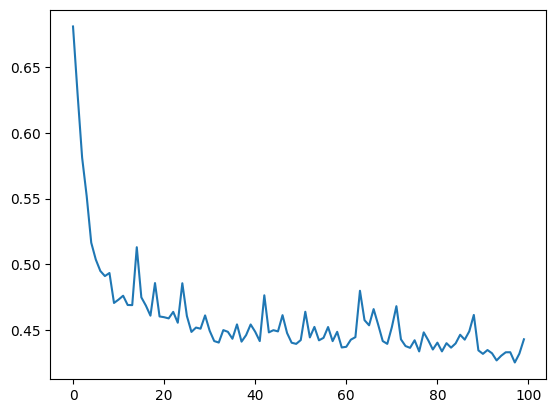

In [13]:
plt.plot(output.history["loss"])
plt.show()

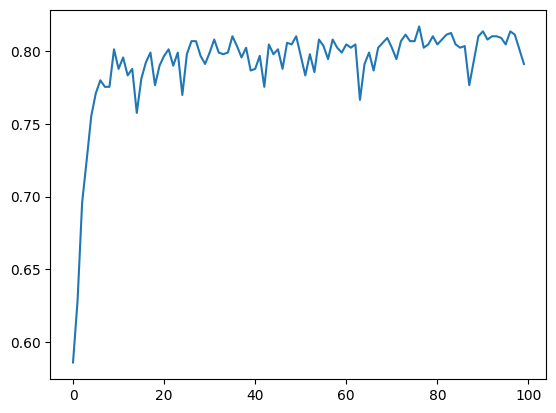

In [14]:
plt.plot(output.history["accuracy"])
plt.show()